In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, PrecisionRecallDisplay, RocCurveDisplay
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bioresponse.csv")
ydf = df['Activity']
xdf = df.drop(columns = ['Activity'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
        xdf, ydf, test_size=0.1, random_state=42)
df.head(7)

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.00,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.00,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.00,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.50,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.00,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
5,0,0.133333,0.771035,0.20,0.25,0.122153,0.677398,0.267224,0.611112,0.701421,...,0,0,0,0,0,0,0,0,0,0
6,1,0.066700,0.567401,0.10,0.00,0.116578,0.689802,0.274886,0.548509,0.785429,...,0,0,0,0,0,0,0,0,0,0


+--------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                                Model | Accuracy           | Precision          | Recall             | F1                 | LogLoss            |
+--------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  DecisionTreeClassifier(max_depth=2) | 0.7553191489361702 | 0.7922705314009661 | 0.7922705314009661 | 0.7809523809523811 | 8.451068646333194  |
| DecisionTreeClassifier(max_depth=10) | 0.7553191489361702 | 0.7894736842105263 | 0.7894736842105263 | 0.7819905213270142 | 8.451070772922105  |
|  RandomForestClassifier(max_depth=2) | 0.7287234042553191 | 0.7557603686635944 | 0.7557603686635944 | 0.7627906976744185 | 9.369674390810346  |
| RandomForestClassifier(max_depth=10) | 0.8058510638297872 | 0.8271028037383178 | 0.8271028037383178 | 0.82903981264637   |

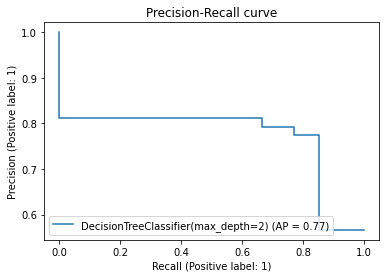

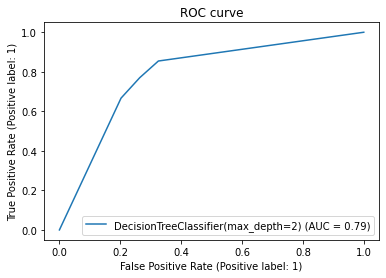

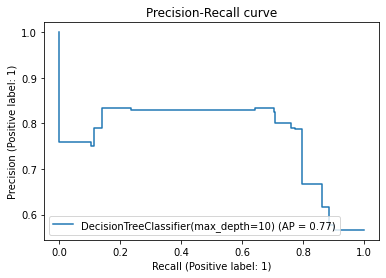

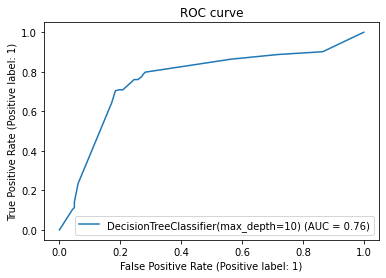

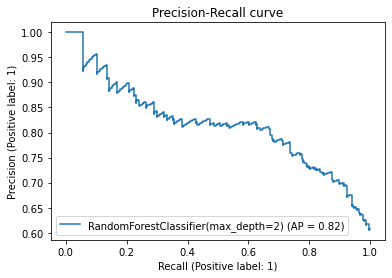

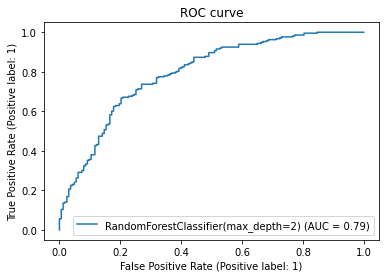

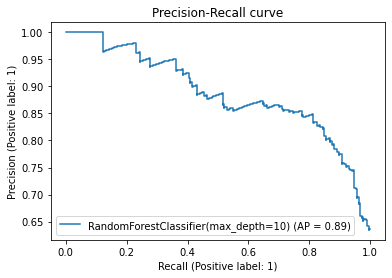

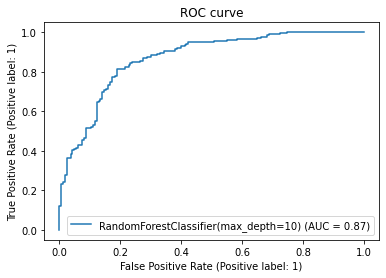

In [3]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1", "LogLoss"]

models = {
    "SDT": DecisionTreeClassifier(max_depth=2),
    "DDT": DecisionTreeClassifier(max_depth=10),
    "RFS": RandomForestClassifier(max_depth=2),
    "RFD": RandomForestClassifier(max_depth=10)
}
for i in models.keys():
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    prec = precision_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    table.add_row([str(models[i]), 
                    accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred), 
                    recall_score(y_pred, y_test), 
                    f1_score(y_test, y_pred), 
                    log_loss(y_test, y_pred)])
    display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name=str(models[i])
    )
    _ = display.ax_.set_title("Precision-Recall curve")
    display = RocCurveDisplay.from_estimator(
    model, X_test, y_test, name=str(models[i])
    )
    _ = display.ax_.set_title("ROC curve")

table.align = 'l'
table.align['Model'] = 'r'
print(table)